In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


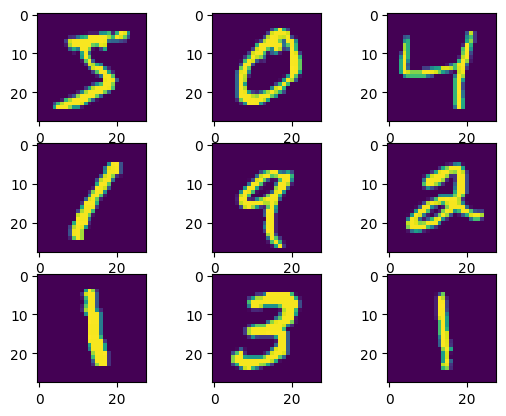

In [4]:
# plotting the first 9 images in the train set of MNIST

fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to a 784-dimensional vector
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 units and ReLU activation
    keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    keras.layers.Dense(10, activation='softmax')  # Output layer with 10 units for digit classification
])


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 3.7292 - accuracy: 0.7305
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.6716 - accuracy: 0.8279
Epoch 3/10
600/600 [==============================] - 3s 6ms/step - loss: 0.4991 - accuracy: 0.8646
Epoch 4/10
600/600 [==============================] - 3s 4ms/step - loss: 0.4182 - accuracy: 0.8845
Epoch 5/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3651 - accuracy: 0.8970
Epoch 6/10
600/600 [==============================] - 3s 4ms/step - loss: 0.3206 - accuracy: 0.9072
Epoch 7/10
600/600 [==============================] - 4s 6ms/step - loss: 0.2927 - accuracy: 0.9176
Epoch 8/10
600/600 [==============================] - 3s 4ms/step - loss: 0.2861 - accuracy: 0.9210
Epoch 9/10
600/600 [==============================] - 3s 4ms/step - loss: 0.2673 - accuracy: 0.9249
Epoch 10/10
600/600 [==============================] - 3s 4ms/step - loss: 0.2539 - accuracy: 0.9273

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.9432
0.3185282349586487
0.9431999921798706


In [9]:
prediction = model.predict([X_test])
prediction

313/313 [==============================] - 1s 2ms/step


array([[4.5642265e-23, 1.3603476e-20, 4.3622663e-15, ..., 9.9999982e-01,
        0.0000000e+00, 6.6980789e-08],
       [0.0000000e+00, 5.1033063e-11, 9.9999994e-01, ..., 0.0000000e+00,
        2.7415493e-35, 0.0000000e+00],
       [3.6095031e-18, 9.9999851e-01, 2.4252338e-22, ..., 2.4471706e-07,
        1.1843565e-11, 1.9251795e-17],
       ...,
       [1.4170886e-33, 5.0015898e-16, 5.5746343e-31, ..., 8.7418406e-16,
        1.1103022e-17, 5.4047430e-11],
       [1.9153516e-17, 6.5410711e-12, 6.0360355e-17, ..., 8.7103830e-31,
        3.8433305e-09, 3.5899451e-23],
       [2.6257005e-14, 0.0000000e+00, 5.4230708e-15, ..., 1.1784309e-24,
        1.1618034e-25, 0.0000000e+00]], dtype=float32)

In [10]:
# prediction for single image

print('Probabilities: ', prediction[10])
print('\n')
print('Prediction: ', np.argmax(prediction[10]))

Probabilities:  [9.9995738e-01 1.3845884e-18 6.7241639e-15 8.1102737e-22 5.6915912e-08
 2.4941942e-09 3.4010740e-05 8.5861175e-06 2.0250672e-17 1.1422329e-12]


Prediction:  0


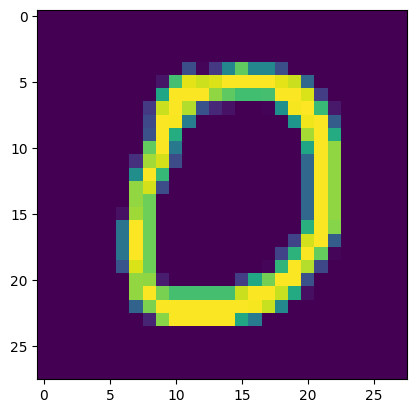

In [11]:
# visualize the image

plt.imshow(X_test[10])
plt.show()